# What happens to the placement of prime numbers in unfounded expressions?

### No.1  

### 素数のリストを作る。  

この先、素数のリストを作成する場合、以下の関数でリストを生成します。
正直、この関数で本当にちゃんと素数が生成されているか確証はないですが...多分大丈夫でしょ？  


In [3]:
import numpy as np

def choice_prime_num(arr):
    """ エラトステネスのふるい """
    if isinstance(arr, np.ndarray):
        arr = arr.tolist()
    if 0 in arr:
        arr.remove(0)
    if 1 in arr:
        arr.remove(1)
    prime = []
    _min = min(arr)
    _max = max(arr)
    while _min <= np.sqrt(_max):
        _min = min(arr)
        prime.append(_min)
        for i in arr:
            if i != _min and i % _min == 0:
                arr.remove(i)
        arr.remove(_min)
    prime.extend(arr)

    return prime

prime =choice_prime_num(np.arange(0, 1000))
print(prime)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997]


## 渦巻状に数値を配置してみる  

まずは、螺旋状に配置してみる。  
条件は以下。

- $n =$ 5,000以下の整数  
- 半径は $r = n$   
- 角度(rad)は右の値で変化させていく。&emsp;$\theta = \frac{e}{2 \pi}n$


座標上の点 $(x, y)$は  
- $x = r \cos{(\theta)}$
- $y = r \sin{(\theta)}$

として描画してみます。

改めて言っておきますが、式は**思い付きで**組み合わせただけのものです。


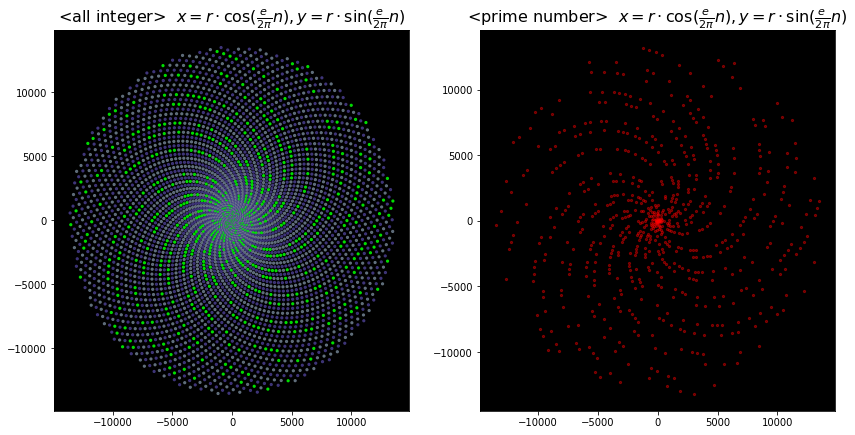

In [81]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


# Maximum number of integers to handle
size = np.arange(0, 5001)

prime = np.array(choice_prime_num(size))


# Try switching "rad".
rad = {'rad': np.e / 2 * np.pi, 'text': r'\frac{e}{2 \pi}'}
# rad = {'rad': np.pi**np.e / np.e**(np.pi), 'text': r'\frac{\pi^{e}}{e^{\pi}}'}
# rad = {'rad': 2 * np.pi**np.e / np.e**(-2 * np.pi), 'text': r'\frac{2 \pi^{e}}{e^{-2 \pi}}'}
# rad = {'rad': np.pi**np.e / np.e**(-np.pi), 'text': r'\frac{\pi^{e}}{e^{- \pi}}'}
# rad = {'rad': 2 * np.pi / np.e, 'text': r'\frac{2 \pi}{e}'}
# rad = {'rad': np.e / (2 * np.pi), 'text': r'\frac{e}{2 \pi}'}
# rad = {'rad': np.e**(np.pi) / (np.pi**np.e), 'text': r'\frac{e^{\pi}}{\pi^{e}}'}


radius = lambda n: n*np.e  

colors = []
for num in range(len(size)):
    if num in prime:
        colors.append('lime')
    elif num % 2 == 0:
        colors.append('darkslateblue')
    else:
        colors.append('slategray')

# ax1: All integer, ax2: prime number only
ax1_x = radius(size) * np.cos(rad['rad'] * size)
ax1_y = radius(size) * np.sin(rad['rad'] * size)
ax2_x = radius(prime) * np.cos(rad['rad'] * prime)
ax2_y = radius(prime) * np.sin(rad['rad'] * prime)

plt.figure(figsize=(14, 7))

ax1 = plt.subplot(121)
ax1.set_title(r'<all integer>  $x=r \cdot \cos({} n), y=r \cdot \sin({} n)$'.format(rad['text'], rad['text']), fontsize=16)
ax1.set_facecolor('black')
ax1.scatter(ax1_x, ax1_y, s=5, c=colors, alpha=0.8)

ax2 = plt.subplot(122)
ax2.set_title(r'<prime number>  $x=r \cdot \cos({} n), y=r \cdot \sin({} n)$'.format(rad['text'], rad['text']), fontsize=16)
ax2.set_facecolor('black')
ax2.scatter(ax2_x, ax2_y, s=5, c='red', alpha=0.4)

plt.show()



どうなんでしょう？？  
何となく、法則性があるような、無いような...

`size`の値や`rad`のパターンを変更してみると（コメントアウトを外して切り替えてみて下さい）違った法則があるように見えたり、単にスケールの違いだけの問題のように見えたり…  

**まぁ、率直に言ってよく分かりません（苦笑）**  

